# Case Study on Supervised Learning 

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [1]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ir = pd.read_excel('iris (1).xls')

## *1. Reading the dataset to the python environment.*

In [3]:
ir.head()   #displaying dataframe

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ir.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
ir.info()                                  # extracting basic details from dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Remarks:
    
    The given iris dataset contains following informations,
    
    ⨀ 150 samples of three different classification(iris-setosa, iris-virginica, iris-versicolor) of iris flower 50 each.
    
    ⨀ properties given for each classification: sepal length(SL), petal length(PL), sepal width(SW), petal width(PW).
        
    ⨀ datatypes : float64(4), object(1)
        
    ⨀ 19 missing values in total.    

## *2. Do necessary pre-processing steps.*

In [6]:
ir.shape                                   # displaying rows and columns.

(150, 5)

In [7]:
# checking missing values
ir.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
# Checking datatypes
ir.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

### Remarks: 

   ⨀ Dataset contains 150 rows and 5 columns, where column 'classification' is our target containing three species.

   ⨀ There are null values in 'SL', 'SW', 'PL' float datatypes.

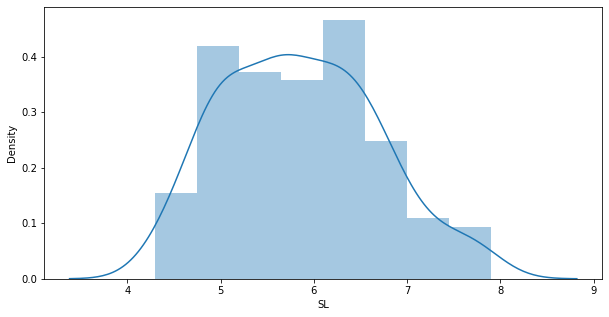

In [9]:
# Checking skewness of columns SL, PL, SW by plotting distplot
fig, ax = plt.subplots(figsize=(10,5))        
sns.distplot(ir.SL);

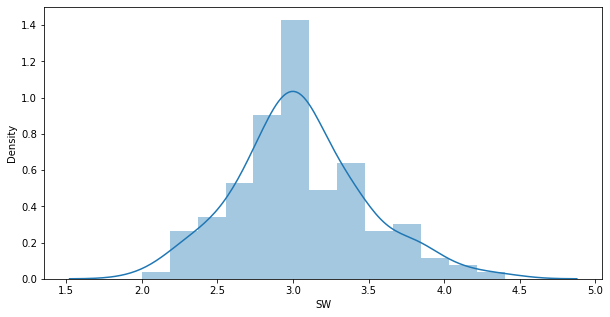

In [10]:
fig, ax = plt.subplots(figsize=(10,5))        
sns.distplot(ir.SW);

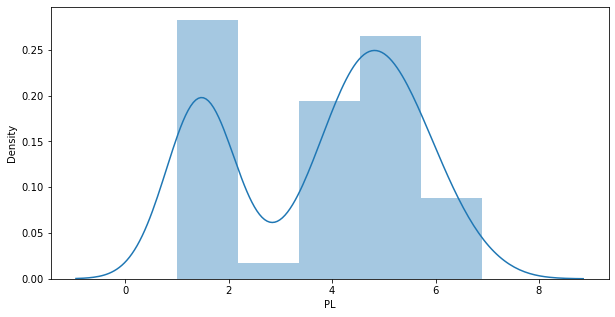

In [11]:
fig, ax = plt.subplots(figsize=(10,5))        
sns.distplot(ir.PL);

### Remarks:

⨀ From the distribution plots, we can see that the columns, 'SW' is normally distributed and 'SL' is almost normally distributed. So, we can fill their missing values using mean.

⨀ From histogram of PL, we can use median to fill missing values.

We need to fill the missing values in these columns. The column classification contain three classes of species, so we need to fill it seperately.

In [12]:
IR_mean = ir.groupby('Classification')['SL','SW'].mean()
IR_mean

,SL,SW
Classification,,
Iris-setosa,5.008511,3.408511
Iris-versicolor,5.925000,2.781250
Iris-virginica,6.616667,2.967347


In [13]:
PL_median = ir.groupby('Classification')['PL'].median()
PL_median

Classification
Iris-setosa        1.50
Iris-versicolor    4.35
Iris-virginica     5.55
Name: PL, dtype: float64

In [14]:
ir['SL'] = ir['SL'].fillna(ir.groupby('Classification')['SL'].transform('mean'))

ir['SW'] = ir['SW'].fillna(ir.groupby('Classification')['SW'].transform('mean'))

ir['PL'] = ir['PL'].fillna(ir.groupby('Classification')['PL'].transform('median'))

In [15]:
ir.isna().sum()    # checking again the null values

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Remarks:
    we have filled the missing values in SW,SL,PL Columns. Now we have to check for any outliers.

### Checking for outliers

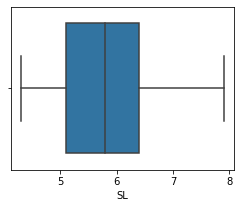

In [16]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(ir.SL);

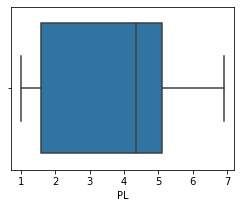

In [17]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(ir.PL);

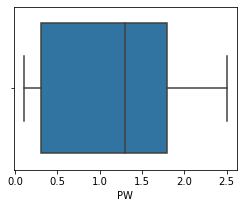

In [18]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(ir.PW);

### Remarks :
    There are no outliers in the numerical data of iris dataset.
    Now, we can model the preprocessed data.

In [19]:
# label encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ir['Classification']=le.fit_transform(ir['Classification'])
ir

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,0
1,4.900000,3.0,1.40,0.2,0
2,5.008511,3.2,1.30,0.2,0
3,4.600000,3.1,1.50,0.2,0
4,5.000000,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,2
146,6.300000,2.5,5.00,1.9,2
147,6.500000,3.0,5.55,2.0,2
148,6.200000,3.4,5.40,2.3,2


now the categorical data in column Classification is converted to numerical.

### 3. Find out which classification model gives the best result to predict iris species.(Also do random forest algorithm).

In [20]:
# seperating features and target(ie,Classification)
x= ir.drop(['Classification'],axis=1)
y= ir['Classification']

In [21]:
x.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.008511,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [23]:
# splitting dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [24]:
print(x.shape)

(150, 4)


In [25]:
print(y.shape)

(150,)


We are going to build different models on the data and then we can evaluate their performance based on accuracy score, precision score, recall score, f1 score. 

## (a) Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

loR_model = LogisticRegression()
loR_model.fit(x_train,y_train)
y_pred = loR_model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [28]:
print("Accuracy is:" , accuracy_score(y_test,y_pred))
print("precision is:" , precision_score(y_test,y_pred,average='macro'))
print("Recall is:" , recall_score(y_test,y_pred, average='macro'))
print("f1 score is:" , f1_score(y_test,y_pred, average='macro'))

Accuracy is: 1.0
precision is: 1.0
Recall is: 1.0
f1 score is: 1.0


we can evaluate the performance of this classifier by confusion_matrix (2*2 matrix). Each row of it denotes the actual class while each column is the predicted class.

In [29]:
#comparing y_test and y_pred
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

The given dataset contains 3 classes in the column Classifcation, hence we get a 3*3 matrix.

In [30]:
# Creating a dataframe for Confusion matrix
cm_df = pd.DataFrame(cm,index=['Setosa','Versicolor','Virginica'], columns=['Setosa','Versicolor','Virginica'])
cm_df

,Setosa,Versicolor,Virginica
Setosa,10,0,0
Versicolor,0,9,0
Virginica,0,0,11


In [31]:
#True positive(TP), False negative (FN), False positive(FP), True negative(TN)  values of iris classes from confusion matrix can be found out;

#iris_Setosa: TP = 10, FN =  0, FP =  0, TN = 19

#iris_versicolor :   TP = 9, FN = 0, FP = 0, TN = 21

#iris_virginica : TP = 11, FN = 0, FP = 0, TN = 19

#### Findings: 
Logistic regression model has accuracy = 100 % and there are no misclassifiers in this model.

## (b) K- Nearest Neighbors (K-NN)

In [32]:

from sklearn.neighbors import KNeighborsClassifier

acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
    

In [33]:
#checking accuracy
acc_values

[0.9666666666666667,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

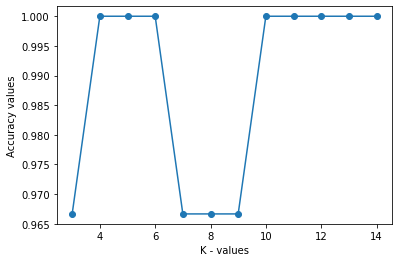

In [34]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

#### Remarks: Accuracy is high for K values; 4,5,6,10,11,12,13,14. so we can use any of them to build the model.

In [35]:
Classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

In [36]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0


In [37]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### findings:
    KNN model has an accuracy score = 100 % and there are no misclassifiers in this model.

## (c) Decision tree classifier

In [38]:

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

print('Accuracy on decision tree model is: ', accuracy_score(y_test, y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy on decision tree model is:  1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0


In [39]:
y_test.value_counts()

2    11
0    10
1     9
Name: Classification, dtype: int64

In [40]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### Findings: 
    Decision tree model has accuracy = 100 % and there are no misclassifications in this model.

## (d) Support vector machine (SVM)

In [41]:
#by linear svm 
from sklearn.svm import SVC

svm_linear = SVC(kernel ='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

print('Accuracy on linear svm is: ', accuracy_score(y_test, y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy on linear svm is:  1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0


In [42]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### Findings:
    linear svm model has an accuracy score = 100 % and there are no misclassifiers in this model.

In [43]:
# polynomial svm

svm_poly = SVC(kernel= 'poly')
svm_poly.fit(x_train, y_train)
y_pred = svm_poly.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9666666666666667
Precision score is: 0.9722222222222222
Recall score is: 0.9629629629629629
f1 score is: 0.9658994032395567


In [44]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

### Findings: 
There is missclassification in this model with accuracy 96%.

In [47]:
# radial svm

svm_rad = SVC(kernel='rbf')
svm_rad.fit(x_train, y_train)
y_pred = svm_rad.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9666666666666667
Precision score is: 0.9666666666666667
Recall score is: 0.9696969696969697
f1 score is: 0.9665831244778613


In [48]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

### findings: 
Radial SVM model with accuracy = 96 % and there is one misclassifier  in this model. 

## (e) Random forest classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [50]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average='micro'))
print("Recall is: ", recall_score(y_test,y_pred, average='micro'))
print("f1 score is: ", f1_score(y_test,y_pred, average='micro'))

Accuracy is:  0.9666666666666667
Precision is:  0.9666666666666667
Recall is:  0.9666666666666667
f1 score is:  0.9666666666666667


In [51]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

### findings:
Random forest model having accuracy = 96 % and there is one misclassification in this model

### Feature importance

In [53]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PL    46.155023
PW    41.356297
SL     9.260806
SW     3.227875
dtype: float64

from this we can see that the 'SW' have lower percentage which is less important feature. we can drop it if we want but model is still have 96% accuracy.

## Inference:

#### By evaluating all these models, we can clearly see that logistic regression, KNN, Decision tree, Linear SVM are having an accuracy score of 1.0. We can choose any of these models to predict iris species. we cannot say which is best , for that we have to fine tune hyperparameters.

#### Sruthy B(DSA-B3)